# Bike sharing challenge

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime

In [2]:
import warnings  
warnings.filterwarnings('ignore')

In [3]:
HOME_PATH = r'../input'
os.listdir(HOME_PATH)

['train.csv', 'sampleSubmission.csv', 'test.csv']

In [4]:
train_set = pd.read_csv(HOME_PATH+'/train.csv')

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Feature functions

In [6]:
def split_datetime(df):
    splitted_date = df['datetime'].str.split('-')
    df['year'] = [int(date[0]) for date in splitted_date]
    df['year'].loc[df['year']==2011] = 1
    df['year'].loc[df['year']==2012] = 2
#     df['month'] = [date[1] for date in splitted_date]
#     df['day'] = [int(date[2].split(" ")[0]) for date in splitted_date]
    df['time'] = [date[2].split(" ")[1] for date in splitted_date]

In [7]:
def round_temp(df):
    df['rounded_temp'] = df['temp'].round()
    df['rounded_atemp'] = df['atemp'].round()

In [8]:
def month_to_num(df):
    """ Convert month to numerical """
    for i in range(1,10):
        df['month'].loc[df['month']=='0'+str(i)] = i
    for i in range(10,13):
        df['month'].loc[df['month']==str(i)] = i

In [9]:
def time_to_num(df):
    """ Convert time to numerical """
    for i in range(0,10):
        df['time'].loc[df['time']=='0'+str(i)+':00:00'] = i
    for i in range(10,24):
        df['time'].loc[df['time']==str(i)+':00:00'] = i

In [10]:
def weekend(df):
    df['weekend'] = np.zeros_like(df['holiday'])
    df['weekend'].loc[(df['workingday'] == 0) & (df['holiday'] == 0)] = 1

In [11]:
def weekday(df):
    df['weekday'] = df['datetime'].apply(lambda date : \
                                         datetime.datetime.strptime(str(date.split()[0]),"%Y-%m-%d").weekday())

In [12]:
def process_df(df):
    split_datetime(df)
    round_temp(df)
#     month_to_num(df)
    time_to_num(df)
    weekend(df)
    weekday(df)
    return df.drop('datetime', axis=1)

## Data exploration

In [13]:
pp.ProfileReport(train_set)

Number of variables,12
Number of observations,10886
Total Missing (%),0.0%
Total size in memory,1020.6 KiB
Average record size in memory,96.0 B
Numeric,7
Categorical,0
Boolean,2
Date,0
Text (Unique),1
Rejected,2


In [14]:
train_set = process_df(train_set)

### Datetime

In [15]:
train_set['count_bin'] = np.zeros_like(train_set['count'])
train_set['count_bin'].loc[(train_set['count']>20) & (train_set['count']<100)] = 1
for i in range(2,10):
    train_set['count_bin'].loc[(train_set['count']>(i-1)*100) & (train_set['count']<(i)*100)] = i
train_set['count_bin'].loc[train_set['count']>900] = 10

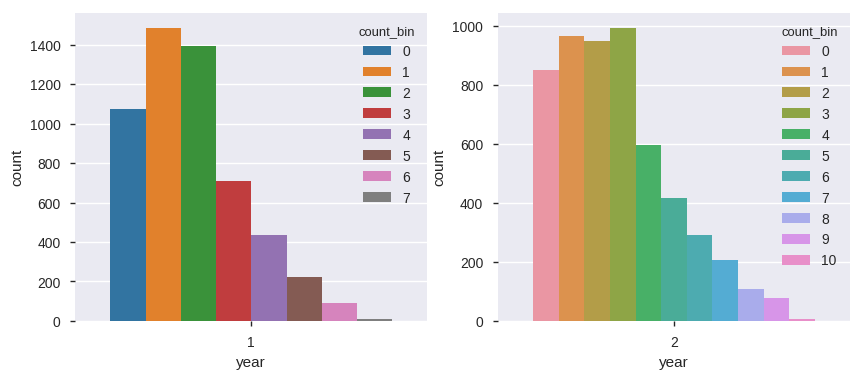

In [16]:
fig = plt.figure(figsize=(10, 4))
fig.add_subplot(1,2,1)
sns.countplot(x='year', hue='count_bin', data=train_set.loc[train_set['year']==1])
fig.add_subplot(1,2,2)
sns.countplot(x='year', hue='count_bin', data=train_set.loc[train_set['year']==2])

In [17]:
# sns.factorplot(x="month",y="count",data=train_set,kind='bar')

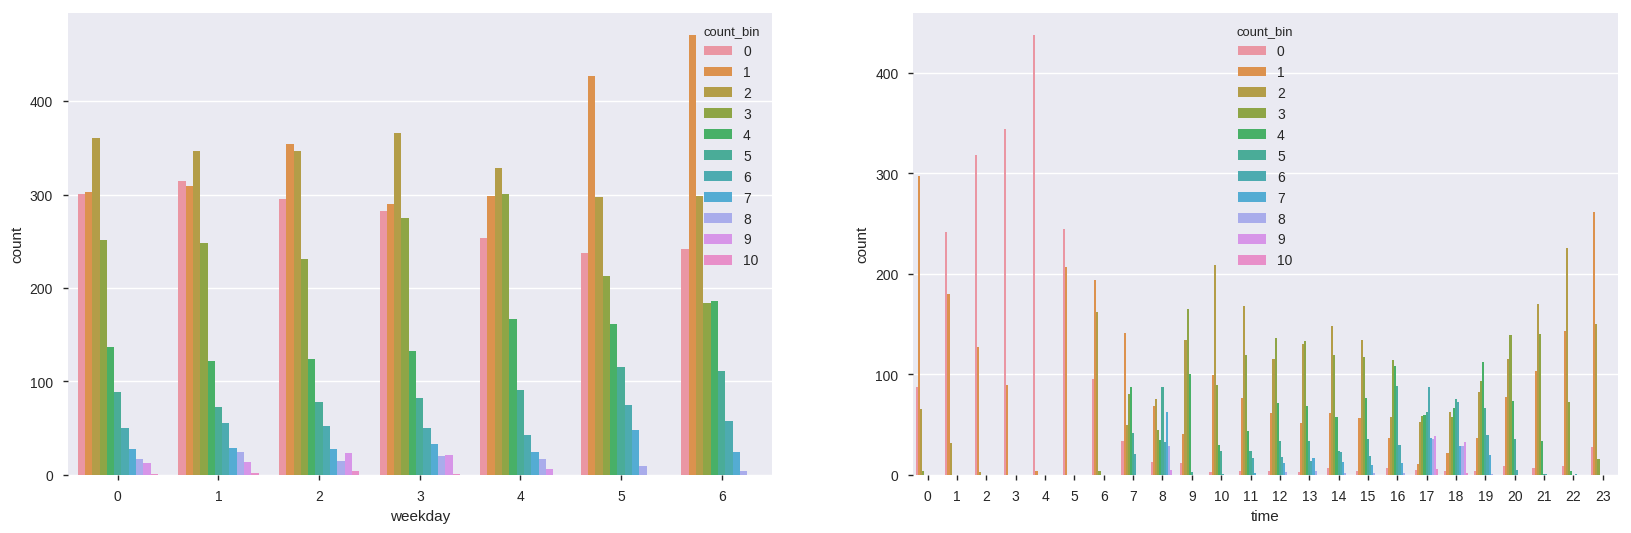

In [18]:
fig = plt.figure(figsize=(20, 6))
fig.add_subplot(1,2,1)
sns.countplot(x='weekday', hue='count_bin', data=train_set)
fig.add_subplot(1,2,2)
sns.countplot(x='time', hue='count_bin', data=train_set)

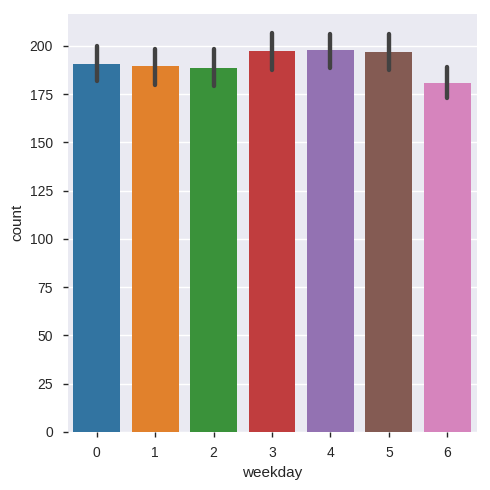

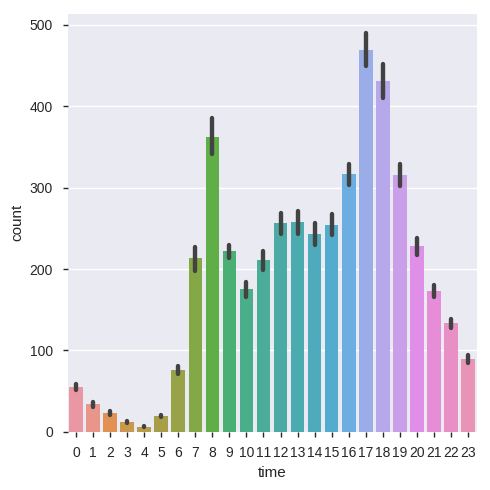

In [19]:
sns.factorplot(x="weekday",y="count",data=train_set,kind='bar')
sns.factorplot(x="time",y="count",data=train_set,kind='bar')

In [20]:
# train_set['high_time'] = np.zeros_like(train_set['time'])
# train_set['high_time'].loc[(((train_set['time'] > 6) & (train_set['time'] < 15)) | (train_set['time'] == 20))] = 1
# train_set['high_time'].loc[((train_set['time'] == 8) | (train_set['time'] == 16) | (train_set['time'] == 19))] = 2
# train_set['high_time'].loc[((train_set['time'] == 17) | (train_set['time'] == 18))] = 3

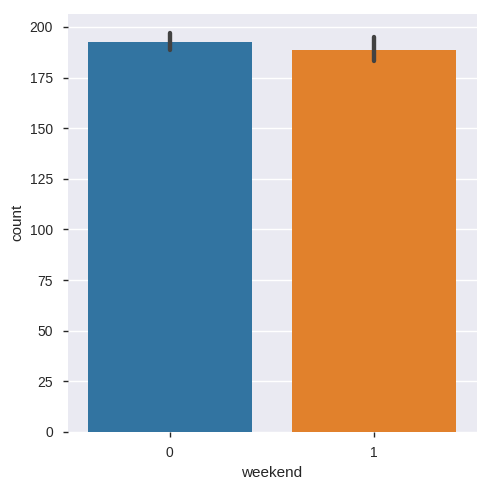

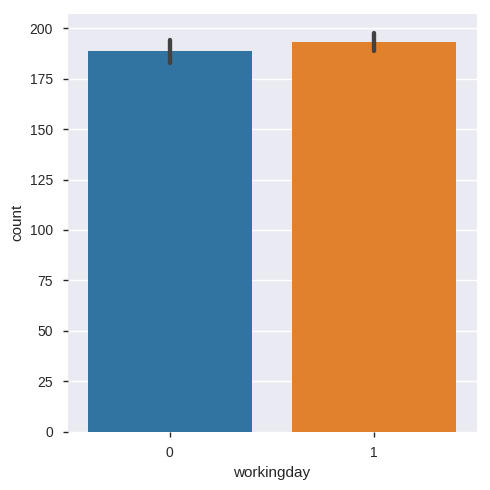

In [21]:
# fig = plt.figure(figsize=(10, 4))
# fig.add_subplot(1,2,1)
sns.factorplot(x="weekend",y="count",data=train_set,kind='bar')
# sns.countplot(x='weekend', hue='count_bin', data=train_set.loc[train_set['weekend']==1])
# fig.add_subplot(1,2,2)
sns.factorplot(x="workingday",y="count",data=train_set,kind='bar')
# sns.countplot(x='workingday', hue='count_bin', data=train_set.loc[train_set['workingday']==1])

### Temp and atemp

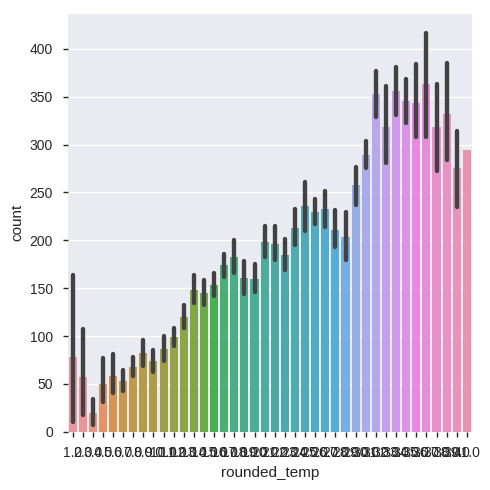

In [22]:
sns.factorplot(x="rounded_temp",y="count",data=train_set,kind='bar')

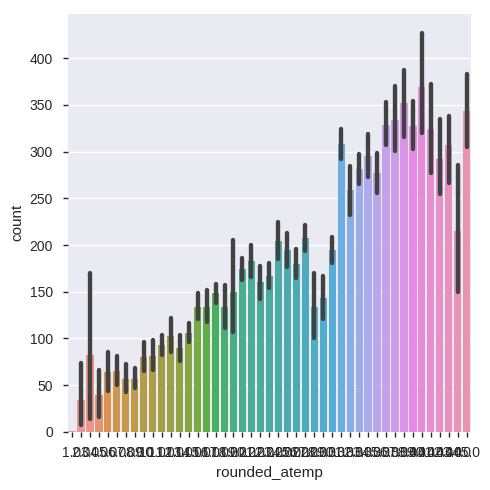

In [23]:
sns.factorplot(x="rounded_atemp",y="count",data=train_set,kind='bar')

### Season

(array([136., 153.,  88.,  62.,  48.,  47.,  44.,  28.,  29.,  36.]),
 array([ 1. ,  5.8, 10.6, 15.4, 20.2, 25. , 29.8, 34.6, 39.4, 44.2, 49. ]),
 <a list of 10 Patch objects>)

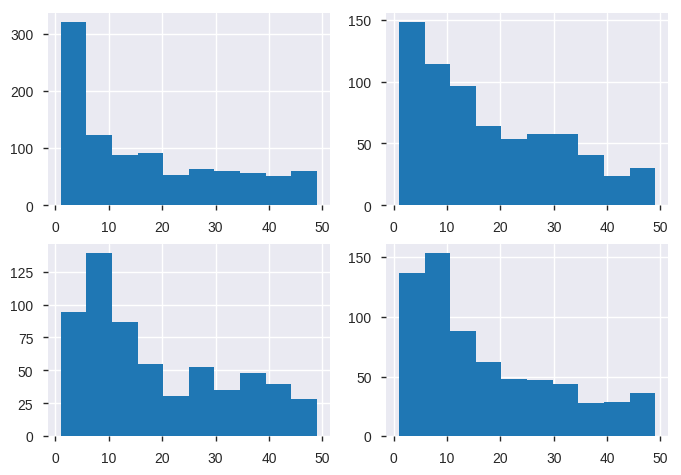

In [24]:
fig = plt.figure()
fig.add_subplot(2,2,1)
plt.hist(train_set['count'].loc[(train_set['count']<50) & (train_set['season']==1)])

fig.add_subplot(2,2,2)
plt.hist(train_set['count'].loc[(train_set['count']<50) & (train_set['season']==2)])

fig.add_subplot(2,2,3)
plt.hist(train_set['count'].loc[(train_set['count']<50) & (train_set['season']==3)])

fig.add_subplot(2,2,4)
plt.hist(train_set['count'].loc[(train_set['count']<50) & (train_set['season']==4)])

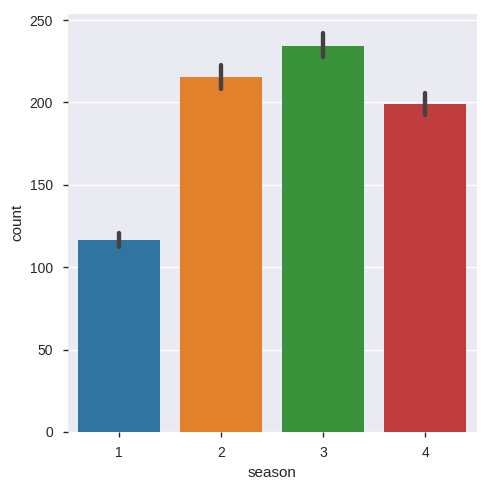

In [25]:
sns.factorplot(x="season",y="count",data=train_set,kind='bar')

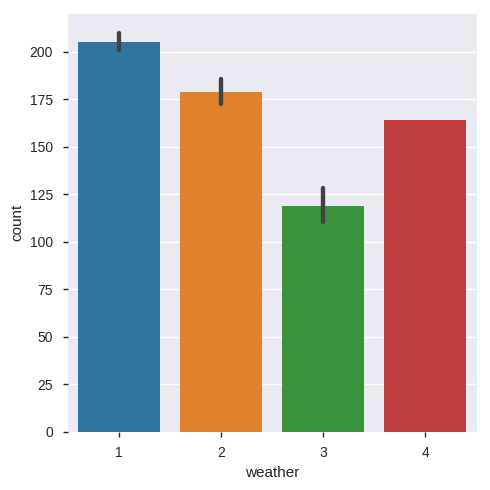

In [26]:
sns.factorplot(x="weather",y="count",data=train_set,kind='bar')

In [27]:
train_set['temp_bin'] = np.floor(train_set['temp'])//5

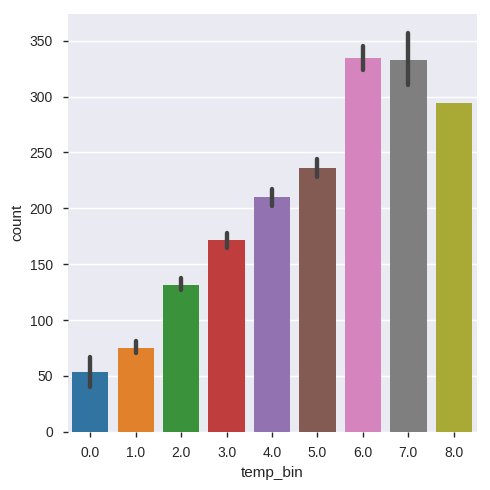

In [28]:
sns.factorplot(x="temp_bin",y="count",data=train_set,kind='bar')

## Model

In [29]:
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
import lightgbm as lgb
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, make_scorer

In [30]:
train_set = pd.get_dummies(train_set, columns=['season', 'weather', 'weekday', 'holiday'])
# train_set = pd.get_dummies(train_set, columns=['season', 'weather', 'weekday', 'year', 'month', 'time'])

In [31]:
train_set['temp_weather_1'] = train_set['temp'] * train_set['weather_1']
train_set['temp_weather_2'] = train_set['temp'] * train_set['weather_2']
train_set['temp_weather_3'] = train_set['temp'] * train_set['weather_3']
train_set['temp_weather_4'] = train_set['temp'] * train_set['weather_4']

In [32]:
y = train_set.loc[:, 'count']
X = train_set.drop(['count', 'count_bin', 'casual', 'registered'], axis=1) 

### Random forest

In [33]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=200, oob_score=True, min_samples_split=4, max_features=0.9, max_depth=17)
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features=0.9, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [34]:
scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_log_error')
print("score, root score: ", scores, np.sqrt(np.abs(scores)))

score, root score:  [-0.62128631 -0.14617456 -0.28525324 -0.11831236 -0.12985614] [0.78821717 0.38232781 0.53409104 0.34396564 0.36035558]


In [35]:
d_importance = pd.DataFrame(columns=['features'], data=X.columns)
d_importance['importance'] = rf.feature_importances_
d_importance.sort_values(by='importance',ascending=False).head(20)

,features,importance
6,time,0.598507
5,year,0.086758
0,workingday,0.043200
2,atemp,0.036714
1,temp,0.033704
3,humidity,0.028841
9,weekend,0.028067
11,season_1,0.026444
7,rounded_temp,0.025660
28,temp_weather_1,0.017664


### LGB

In [36]:
# def RMSLE(y_hat, data):
#     y_true = data.get_label()
#     y_hat = np.round(y_hat)
#     y_hat[y_hat<0]=0
#     return 'rmlse', np.sqrt(mean_squared_log_error(y_true, y_hat)), True

In [37]:
# d_train = lgb.Dataset(X, label=y)
# params = {'objective': 'regression', 'metric': 'rmsle', 'random_state': 501, 'verbose': 0, 'reg_alpha ': 0.1, 'reg_lambda': 0.1}

In [38]:
# lgb_cv = lgb.cv(
#             params, 
#             d_train,
#             metrics = 'rmsle',
#             feval= RMSLE,
#             nfold=5,
#             verbose_eval = 5)

In [39]:
# lgb_model = lgb.train(
#             params, 
#             d_train,
#             feval= RMSLE,
#             verbose_eval = 5)

In [40]:
# d_importance = pd.DataFrame(columns=['features'], data=X.columns)
# d_importance['gain_importance'] = lgb_model.feature_importance(importance_type='gain')
# d_importance['split_importance'] = lgb_model.feature_importance(importance_type='split')
# d_importance.sort_values(by='gain_importance',ascending=False).head(25)

### XGB

In [41]:
# xgb_model = XGBRegressor(colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=4, subsample=0.7, random_state=42)
# xgb_model.fit(X, y)

In [42]:
# def rmsle(y_true, y_hat):
#     y_hat = np.round(y_hat)
#     y_hat[y_hat<0]=0
#     return np.sqrt(mean_squared_log_error(y_true, y_hat))

# rmsle_score = make_scorer(rmsle, greater_is_better=False)

In [43]:
# scores = cross_val_score(xgb_model, X, y, cv=5, scoring=rmsle_score)
# print("scores ", np.abs(scores))

In [44]:
# d_importance = pd.DataFrame(columns=['features'], data=X.columns)
# d_importance['importance'] = xgb_model.feature_importances_
# d_importance.sort_values(by='importance',ascending=False).head(20)

## Submission

### Preprocessing

In [45]:
test_set = pd.read_csv(HOME_PATH+'/test.csv')
y_test = test_set['datetime']
test_set = process_df(test_set)
test_set = pd.get_dummies(test_set, columns=['season', 'weather', 'weekday', 'holiday'])

In [46]:
test_set['temp_weather_1'] = test_set['temp'] * test_set['weather_1']
test_set['temp_weather_2'] = test_set['temp'] * test_set['weather_2']
test_set['temp_weather_3'] = test_set['temp'] * test_set['weather_3']
test_set['temp_weather_4'] = test_set['temp'] * test_set['weather_4']

test_set['temp_bin'] = np.floor(test_set['temp'])//5

# test_set['high_time'] = np.zeros_like(test_set['time'])
# test_set['high_time'].loc[(((test_set['time'] > 6) & (test_set['time'] < 15)) | (test_set['time'] == 20))] = 1
# test_set['high_time'].loc[((test_set['time'] == 8) | (test_set['time'] == 16) | (test_set['time'] == 19))] = 2
# test_set['high_time'].loc[((test_set['time'] == 17) | (test_set['time'] == 18))] = 3

In [47]:
test_set.head()

,workingday,temp,atemp,humidity,windspeed,year,time,rounded_temp,rounded_atemp,weekend,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,holiday_0,holiday_1,temp_weather_1,temp_weather_2,temp_weather_3,temp_weather_4,temp_bin
0,1,10.66,11.365,56,26.0027,1,0,11.0,11.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,10.66,0.0,0.0,0.0,2.0
1,1,10.66,13.635,56,0.0000,1,1,11.0,14.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,10.66,0.0,0.0,0.0,2.0
2,1,10.66,13.635,56,0.0000,1,2,11.0,14.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,10.66,0.0,0.0,0.0,2.0
3,1,10.66,12.880,56,11.0014,1,3,11.0,13.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,10.66,0.0,0.0,0.0,2.0
4,1,10.66,12.880,56,11.0014,1,4,11.0,13.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,10.66,0.0,0.0,0.0,2.0


In [48]:
predictions = np.zeros_like(y_test)
predictions = (rf.predict(test_set)).round().astype(int)
predictions[predictions < 0] = 0

submission = pd.concat([y_test, pd.Series(predictions, name="count")], axis=1)
print(submission.head(30))

submission.to_csv("submission.csv", index=False)

               datetime  count
0   2011-01-20 00:00:00     39
1   2011-01-20 01:00:00     19
2   2011-01-20 02:00:00     14
3   2011-01-20 03:00:00      8
4   2011-01-20 04:00:00      7
5   2011-01-20 05:00:00     16
6   2011-01-20 06:00:00     71
7   2011-01-20 07:00:00    228
8   2011-01-20 08:00:00    372
9   2011-01-20 09:00:00    173
10  2011-01-20 10:00:00    141
11  2011-01-20 11:00:00    109
12  2011-01-20 12:00:00    134
13  2011-01-20 13:00:00    123
14  2011-01-20 14:00:00    130
15  2011-01-20 15:00:00    144
16  2011-01-20 16:00:00    159
17  2011-01-20 17:00:00    276
18  2011-01-20 18:00:00    243
19  2011-01-20 19:00:00    214
20  2011-01-20 20:00:00    108
21  2011-01-20 21:00:00     80
22  2011-01-20 22:00:00     49
23  2011-01-20 23:00:00     32
24  2011-01-21 00:00:00     25
25  2011-01-21 01:00:00     14
26  2011-01-21 02:00:00     10
27  2011-01-21 03:00:00      3
28  2011-01-21 04:00:00      5
29  2011-01-21 05:00:00     15
